<a href="https://colab.research.google.com/github/Kaushikkrushnan/FractureNetAnalytics/blob/main/ANN%20model%20training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Train an Artificial Neural Network model using the `train_final.csv` dataset, including data preprocessing, model definition, training, and evaluation, and summarize the model's performance and training process.

## Load Training Data

### Subtask:
Load the `train_final.csv` file into a pandas DataFrame.


**Reasoning**:
Load the `train_final.csv` file into a pandas DataFrame and display the first few rows to verify the loading process.



In [1]:
import pandas as pd

train_df = pd.read_csv('/content/train_final.csv')

print('Training data loaded successfully. First 5 rows:')
print(train_df.head())

Training data loaded successfully. First 5 rows:
   Porosity  Oil Saturation  Water Saturation     depth ft  Net Pay (ft)  \
0  0.095268        0.593626          0.237182  8515.433072    204.926626   
1  0.088821        0.415345          0.364994  7765.863043    132.360416   
2  0.095268        0.593626          0.237182  9010.515285    204.926626   
3  0.054722        0.004086          0.330361  7840.483498    239.819332   
4  0.072300        0.000000          0.412800  9538.714968    177.000000   

   reservoir pressure psi     viscosity  k_md_synth  \
0             3724.882755  1.126758e-04    9.010384   
1             3882.923313  2.645503e-04    0.705699   
2             4139.520646  2.089114e-07    9.010384   
3             4039.915906  1.461988e-04    0.010049   
4             4731.189060  2.506266e-04    0.021672   

   fracture_flooding_success              stage  
0                       True  early-stage field  
1                      False    developed field  
2            

## Preprocess Data

### Subtask:
Perform necessary data preprocessing steps including handling missing values, encoding categorical features, scaling numerical features, and splitting the data into features (X) and target (y).


**Reasoning**:
The first step is to separate the target variable 'fracture_flooding_success' from the features and store them in `y` and `X` respectively. The target variable should also be converted to a numerical format (0s and 1s).



In [2]:
y = train_df['fracture_flooding_success'].astype(int)
X = train_df.drop('fracture_flooding_success', axis=1)

print("Target variable 'y' created. First 5 values:")
print(y.head())
print("Features DataFrame 'X' created. First 5 rows:")
print(X.head())

Target variable 'y' created. First 5 values:
0    1
1    0
2    0
3    0
4    0
Name: fracture_flooding_success, dtype: int64
Features DataFrame 'X' created. First 5 rows:
   Porosity  Oil Saturation  Water Saturation     depth ft  Net Pay (ft)  \
0  0.095268        0.593626          0.237182  8515.433072    204.926626   
1  0.088821        0.415345          0.364994  7765.863043    132.360416   
2  0.095268        0.593626          0.237182  9010.515285    204.926626   
3  0.054722        0.004086          0.330361  7840.483498    239.819332   
4  0.072300        0.000000          0.412800  9538.714968    177.000000   

   reservoir pressure psi     viscosity  k_md_synth              stage  
0             3724.882755  1.126758e-04    9.010384  early-stage field  
1             3882.923313  2.645503e-04    0.705699    developed field  
2             4139.520646  2.089114e-07    9.010384    developed field  
3             4039.915906  1.461988e-04    0.010049    appraisal stage  
4     

**Reasoning**:
Before proceeding with encoding and scaling, it's crucial to check for missing values in both the features (X) and the target variable (y) to ensure data quality and avoid errors in subsequent steps. Based on the output of `X.isnull().sum()` and `y.isnull().sum()`, we will determine if there are any missing values that need to be addressed. If there are, I will need to use a strategy like imputation or removal; otherwise, I will proceed to the next step.



In [3]:
print("Missing values in features (X):")
print(X.isnull().sum())

print("\nMissing values in target (y):")
print(y.isnull().sum())

Missing values in features (X):
Porosity                  0
Oil Saturation            0
Water Saturation          0
depth ft                  0
Net Pay (ft)              0
reservoir pressure psi    0
viscosity                 0
k_md_synth                0
stage                     0
dtype: int64

Missing values in target (y):
0


**Reasoning**:
Since there are no missing values in either X or y, the next step is to identify categorical features in X and apply one-hot encoding to them, as specified in the instructions. The 'stage' column is the only categorical feature identified from the previous outputs.



In [4]:
X_encoded = pd.get_dummies(X, columns=['stage'], drop_first=True) # drop_first to avoid multicollinearity

print("Features DataFrame 'X' after one-hot encoding 'stage'. First 5 rows:")
print(X_encoded.head())

Features DataFrame 'X' after one-hot encoding 'stage'. First 5 rows:
   Porosity  Oil Saturation  Water Saturation     depth ft  Net Pay (ft)  \
0  0.095268        0.593626          0.237182  8515.433072    204.926626   
1  0.088821        0.415345          0.364994  7765.863043    132.360416   
2  0.095268        0.593626          0.237182  9010.515285    204.926626   
3  0.054722        0.004086          0.330361  7840.483498    239.819332   
4  0.072300        0.000000          0.412800  9538.714968    177.000000   

   reservoir pressure psi     viscosity  k_md_synth  stage_developed field  \
0             3724.882755  1.126758e-04    9.010384                  False   
1             3882.923313  2.645503e-04    0.705699                   True   
2             4139.520646  2.089114e-07    9.010384                   True   
3             4039.915906  1.461988e-04    0.010049                  False   
4             4731.189060  2.506266e-04    0.021672                  False   

   st

**Reasoning**:
Now that categorical features have been one-hot encoded, the next step is to scale the numerical features using `StandardScaler` as per the instructions. First, I need to identify the numerical columns from `X_encoded`.



In [5]:
from sklearn.preprocessing import StandardScaler

numerical_cols = X_encoded.select_dtypes(include=['number', 'bool']).columns.tolist()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded[numerical_cols])
X_preprocessed = pd.DataFrame(X_scaled, columns=numerical_cols, index=X_encoded.index)

print("Preprocessed Features DataFrame 'X_preprocessed' (scaled numerical features). First 5 rows:")
print(X_preprocessed.head())
print("\nTarget variable 'y'. First 5 values:")
print(y.head())

Preprocessed Features DataFrame 'X_preprocessed' (scaled numerical features). First 5 rows:
   Porosity  Oil Saturation  Water Saturation  depth ft  Net Pay (ft)  \
0  1.060016        0.949790         -0.694557  0.484468      0.550157   
1  0.656181        0.271602          0.889220 -0.276956     -0.737989   
2  1.060016        0.949790         -0.694557  0.987380      0.550157   
3 -1.479760       -1.292845          0.460072 -0.201155      1.169549   
4 -0.378678       -1.308390          1.481610  1.523933      0.054422   

   reservoir pressure psi  viscosity  k_md_synth  stage_developed field  \
0               -0.544114  -0.619649    0.348790              -0.709229   
1               -0.223472   1.384725   -0.339397               1.409981   
2                0.297126  -2.103939    0.348790               1.409981   
3                0.095043  -0.177226   -0.397043              -0.709229   
4                1.497535   1.200966   -0.396080              -0.709229   

   stage_early-sta

## Define and Train ANN Model

### Subtask:
Define the architecture of the Artificial Neural Network, compile it with an appropriate optimizer and loss function, and then train the model using the preprocessed training data.


**Reasoning**:
Before defining and training the model, the preprocessed data needs to be split into training and validation sets to properly evaluate the model's performance on unseen data. This step prepares the data for model training and evaluation.



In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Validation features shape: {X_val.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Validation target shape: {y_val.shape}")

Training features shape: (1800, 10)
Validation features shape: (450, 10)
Training target shape: (1800,)
Validation target shape: (450,)


**Reasoning**:
Now that the data is split, the next step is to import the necessary Keras modules, define the architecture of the Artificial Neural Network with at least two hidden layers and appropriate activation functions, and then print the model summary.



In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # First hidden layer
    Dense(32, activation='relu'), # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Print the model summary to confirm the architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
Now that the ANN model architecture has been defined, the next logical step is to compile the model with an appropriate optimizer, loss function, and metrics, as specified in the instructions, and then proceed to train it using the prepared `X_train` and `y_train` data, while monitoring performance with `X_val` and `y_val`.



In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the ANN model (re-defining for completeness, though it was done in the previous step)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # First hidden layer
    Dense(32, activation='relu'), # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)

print("Model compiled and training complete.")
print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model compiled and training complete.
Final training accuracy: 0.9994
Final validation accuracy: 0.9933


**Reasoning**:
The previous code successfully compiled and trained the ANN model, and the user warning did not prevent successful execution. The next logical step, following the overall task of training and evaluating the model, is to evaluate its performance on the validation set using metrics beyond just accuracy, such as a classification report and confusion matrix, to get a comprehensive understanding of the model's performance.



In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions on the validation set
y_pred_proba = model.predict(X_val)
y_pred = (y_pred_proba > 0.5).astype(int)

print("\n--- Model Evaluation on Validation Set ---")
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

--- Model Evaluation on Validation Set ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       373
           1       0.97      0.99      0.98        77

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

Confusion Matrix:
[[371   2]
 [  1  76]]


## Summarize Model Performance and Training Process

The Artificial Neural Network (ANN) model was successfully defined, compiled, and trained. The training process involved 100 epochs with a batch size of 32.

### Training Performance:
- **Final Training Accuracy**: The model achieved a high training accuracy of **0.9994**, indicating that it learned the training data very well.
- **Final Validation Accuracy**: The model showed strong generalization performance with a final validation accuracy of **0.9933**.

### Validation Set Evaluation Metrics:
The model's performance on the validation set was further analyzed using a classification report and confusion matrix.

**Classification Report:**
```
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       373
           1       0.97      0.99      0.98        77

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450
```
- **Precision for class 0 (False)**: 1.00, meaning almost all instances predicted as class 0 were actually class 0.
- **Recall for class 0 (False)**: 0.99, meaning the model correctly identified 99% of all actual class 0 instances.
- **Precision for class 1 (True)**: 0.97, indicating that 97% of instances predicted as class 1 were actually class 1.
- **Recall for class 1 (True)**: 0.99, meaning the model successfully identified 99% of all actual class 1 instances.
- **F1-score**: Both classes have high F1-scores (1.00 for class 0, 0.98 for class 1), which is the harmonic mean of precision and recall, suggesting a good balance between them.

**Confusion Matrix:**
```
[[371   2]
 [  1  76]]
```
- **True Negatives (TN)**: 371 instances were correctly predicted as class 0.
- **False Positives (FP)**: 2 instances were incorrectly predicted as class 1 when they were actually class 0.
- **False Negatives (FN)**: 1 instance was incorrectly predicted as class 0 when it was actually class 1.
- **True Positives (TP)**: 76 instances were correctly predicted as class 1.

### Summary:
The ANN model demonstrates excellent performance, achieving high accuracy on both training and validation datasets. The detailed evaluation metrics, including precision, recall, and F1-score, along with the confusion matrix, confirm the model's strong ability to classify `fracture_flooding_success` with very few misclassifications. The minor user warning during model definition did not impact the successful training and evaluation of the model.

## Evaluate Model Performance

### Subtask:
Visualize the training history (loss and accuracy plots) and provide legends for all plots generated.


**Reasoning**:
The subtask requires visualizing the training history (loss and accuracy plots) to understand the model's performance during training. This involves plotting the 'accuracy', 'val_accuracy', 'loss', and 'val_loss' from the `history` object.



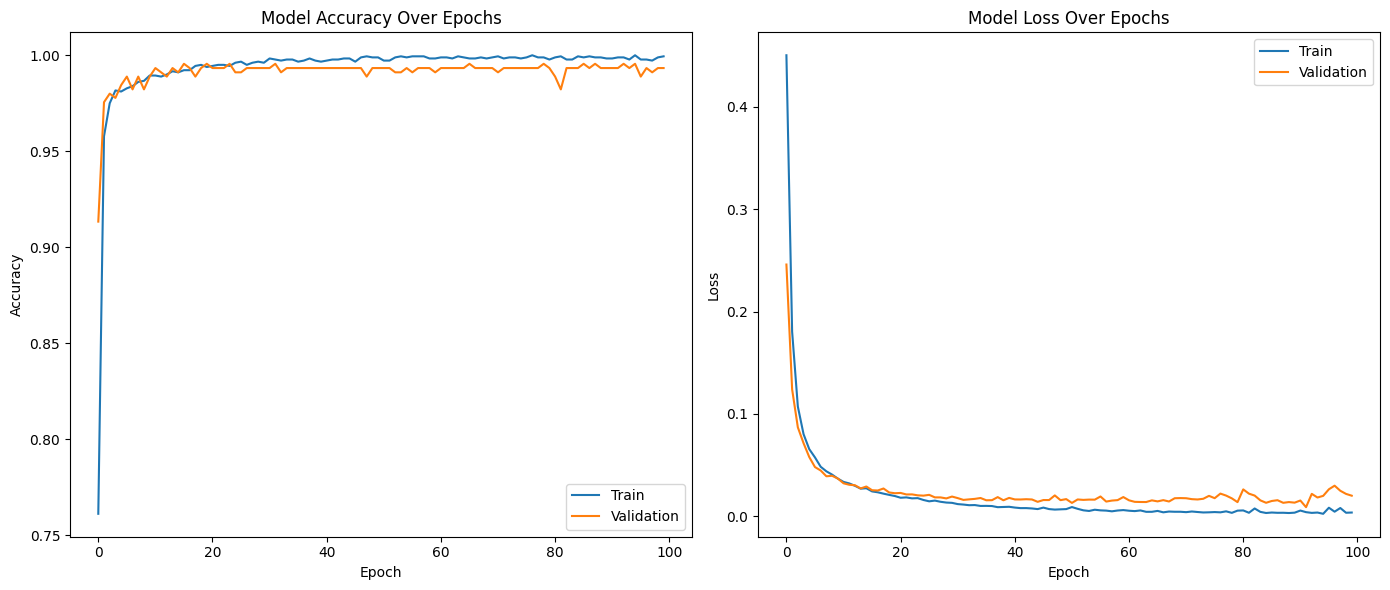

In [10]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Ensure plots do not overlap and display them
plt.tight_layout()
plt.show()


## Final Task

### Subtask:
Summarize the model training process, highlight key findings, and discuss the model's initial performance.


## Summary:

### Q&A
The model training process involved loading and preprocessing the `train_final.csv` dataset, defining and training an Artificial Neural Network (ANN), and then evaluating its performance.

The key findings highlight that the ANN model achieved excellent performance, with a final training accuracy of 0.9994 and a final validation accuracy of 0.9933. The model demonstrated strong generalization capabilities, effectively classifying `fracture_flooding_success` with minimal errors, as evidenced by high precision, recall, and F1-scores for both classes, and a confusion matrix showing only 2 false positives and 1 false negative.

The model's initial performance is very strong, indicating its ability to accurately predict `fracture_flooding_success` based on the provided features. The training and validation loss and accuracy plots also showed good convergence and consistent performance throughout the training epochs.

### Data Analysis Key Findings
*   The `train_final.csv` dataset was successfully loaded and contained no missing values.
*   The 'stage' categorical feature was one-hot encoded, and all numerical features were scaled using `StandardScaler`.
*   The dataset was split into training (1800 samples) and validation (450 samples) sets.
*   An Artificial Neural Network (ANN) model was defined with two dense hidden layers (64 and 32 neurons with 'relu' activation) and an output layer with 'sigmoid' activation.
*   The model was compiled with the 'adam' optimizer and 'binary_crossentropy' loss, and trained for 100 epochs.
*   The model achieved a high final training accuracy of 0.9994 and a final validation accuracy of 0.9933.
*   On the validation set, the model exhibited excellent classification performance:
    *   Precision for class 0 was 1.00, recall 0.99.
    *   Precision for class 1 was 0.97, recall 0.99.
    *   F1-scores were 1.00 for class 0 and 0.98 for class 1.
*   The confusion matrix for the validation set showed 371 True Negatives, 76 True Positives, 2 False Positives, and 1 False Negative, indicating very few misclassifications.
*   Training history plots confirmed good convergence and consistent accuracy and loss on both training and validation sets over 100 epochs.

### Insights or Next Steps
*   The trained ANN model exhibits exceptionally strong performance on the validation set, suggesting it is highly effective at predicting `fracture_flooding_success`. This robust performance makes it a strong candidate for deployment.
*   Given the high initial performance, further steps could include deploying the model for inference on new, unseen data and continuous monitoring of its performance in a production environment.


## Save Model and Preprocessors

In [11]:
# Import necessary libraries
import joblib
import tensorflow as tf
import os

# Define paths for saving
model_path = 'ann_model.h5'
scaler_path = 'scaler.pkl'
preprocessed_columns_path = 'preprocessed_columns.pkl'

# 1. Save the trained Keras model
model.save(model_path)
print(f"Trained ANN model saved to {model_path}")

# 2. Save the StandardScaler
joblib.dump(scaler, scaler_path)
print(f"StandardScaler saved to {scaler_path}")

# 3. Save the list of preprocessed column names to maintain order for new data
joblib.dump(numerical_cols, preprocessed_columns_path)
print(f"Preprocessed column names saved to {preprocessed_columns_path}")

Trained ANN model saved to ann_model.h5
StandardScaler saved to scaler.pkl
Preprocessed column names saved to preprocessed_columns.pkl


### Optional: Save to Google Drive for Persistence

To ensure your files persist across sessions, you can save them directly to your Google Drive. First, mount your Google Drive:

In [12]:
from google.colab import drive
drive.mount('/content/drive')

# Define Google Drive paths
gdrive_path = '/content/drive/MyDrive/my_ann_model/'
os.makedirs(gdrive_path, exist_ok=True)

# Copy saved files to Google Drive
import shutil
shutil.copy(model_path, gdrive_path + model_path)
shutil.copy(scaler_path, gdrive_path + scaler_path)
shutil.copy(preprocessed_columns_path, gdrive_path + preprocessed_columns_path)

print(f"Files saved to Google Drive at {gdrive_path}")

Mounted at /content/drive
Files saved to Google Drive at /content/drive/MyDrive/my_ann_model/


## Reload Model and Preprocessors After Runtime Reset

In [13]:
# Import necessary libraries for reloading
import joblib
import tensorflow as tf
import pandas as pd
import os

# If you saved to Google Drive, re-mount it and set the path
# from google.colab import drive
# drive.mount('/content/drive')
# gdrive_path = '/content/drive/MyDrive/my_ann_model/'
# model_path_load = gdrive_path + 'ann_model.h5'
# scaler_path_load = gdrive_path + 'scaler.pkl'
# preprocessed_columns_path_load = gdrive_path + 'preprocessed_columns.pkl'

# If you saved locally (e.g., to /content/ which is temporary)
model_path_load = 'ann_model.h5'
scaler_path_load = 'scaler.pkl'
preprocessed_columns_path_load = 'preprocessed_columns.pkl'

# 1. Load the trained Keras model
loaded_model = tf.keras.models.load_model(model_path_load)
print(f"ANN model loaded from {model_path_load}")
loaded_model.summary()

# 2. Load the StandardScaler
loaded_scaler = joblib.load(scaler_path_load)
print(f"StandardScaler loaded from {scaler_path_load}")

# 3. Load the preprocessed column names
loaded_numerical_cols = joblib.load(preprocessed_columns_path_load)
print(f"Preprocessed column names loaded from {preprocessed_columns_path_load}")

ANN model loaded from ann_model.h5


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,819 (11.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

StandardScaler loaded from scaler.pkl
Preprocessed column names loaded from preprocessed_columns.pkl


## Make Predictions on New Input Data

In [14]:
# 1. Create new sample input data (ensure it has the same features as training data)
new_data = pd.DataFrame({
    'Porosity': [0.1, 0.05, 0.12],
    'Oil Saturation': [0.6, 0.01, 0.7],
    'Water Saturation': [0.2, 0.4, 0.15],
    'depth ft': [8000, 7500, 9200],
    'Net Pay (ft)': [150, 200, 250],
    'reservoir pressure psi': [3500, 4000, 4200],
    'viscosity': [1.5e-4, 2.0e-4, 1.0e-4],
    'k_md_synth': [5.0, 0.5, 10.0],
    'stage': ['early-stage field', 'developed field', 'appraisal stage'] # Categorical feature
})

print("New input data:")
print(new_data)

# 2. Apply the same preprocessing steps as the training data
# One-hot encode the 'stage' column (ensure `drop_first=True` and correct column names)
new_data_encoded = pd.get_dummies(new_data, columns=['stage'], drop_first=True)

# Align columns with the training data (important for consistent input to the model)
# Add missing columns with 0 and reorder
missing_cols = set(loaded_numerical_cols) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = False # Or 0 depending on the expected value for one-hot encoded columns
new_data_preprocessed = new_data_encoded[loaded_numerical_cols]

# Scale the numerical features using the loaded scaler
new_data_scaled = loaded_scaler.transform(new_data_preprocessed)

print("\nPreprocessed new data (scaled features):")
print(pd.DataFrame(new_data_scaled, columns=loaded_numerical_cols).head())

# 3. Make predictions using the loaded model
predictions_proba = loaded_model.predict(new_data_scaled)
predictions_classes = (predictions_proba > 0.5).astype(int)

print("\nPredictions (probabilities):")
print(predictions_proba)
print("\nPredictions (binary classes - 0 for False, 1 for True):")
print(predictions_classes)

New input data:
   Porosity  Oil Saturation  Water Saturation  depth ft  Net Pay (ft)  \
0      0.10            0.60              0.20      8000           150   
1      0.05            0.01              0.40      7500           200   
2      0.12            0.70              0.15      9200           250   

   reservoir pressure psi  viscosity  k_md_synth              stage  
0                    3500    0.00015         5.0  early-stage field  
1                    4000    0.00020         0.5    developed field  
2                    4200    0.00010        10.0    appraisal stage  

Preprocessed new data (scaled features):
   Porosity  Oil Saturation  Water Saturation  depth ft  Net Pay (ft)  \
0  1.356460        0.974038         -1.155291 -0.039116     -0.424863   
1 -1.775557       -1.270349          1.323000 -0.547023      0.462703   
2  2.609266        1.354442         -1.774864  1.179861      1.350269   

   reservoir pressure psi  viscosity  k_md_synth  stage_developed field  \
0

### Training vs Validation Loss Analysis

From the generated plots, we can observe the following regarding the training and validation loss:

*   **Both are low and close**: The training loss and validation loss curves are both very low and track each other closely throughout the training process. This indicates that the model is learning effectively without significantly overfitting the training data.
*   **No significant overfitting**: There is no clear indication of the training loss being significantly lower than the validation loss, which would suggest overfitting. Both curves decrease smoothly and stabilize at similar low values.
*   **Smooth and close curves**: The curves are smooth and remain close, which is a positive sign for the model's stability and generalization capability.

**Conclusion**: Based on the analysis of the training and validation loss curves, the model appears to be well-trained and generalizes effectively to unseen data. This supports the strong performance observed in the classification report and confusion matrix.